# IRCDL papers

In [1]:
import pandas as pd
import matplotlib
from ast import literal_eval

Data already provided in the `data/raw` folder as downloaded from DBLP at the URL https://dblp.org/search/publ/api?q=stream%3Astreams%2Fconf%2Fircdl%3A&h=1000&format=json.

Uncomment the following cell and execute to fetch raw data from DBLP.

In [2]:
dblp = 'https://dblp.org/search/publ/api?q=stream%3Astreams%2Fconf%2Fircdl%3A&h=1000&format=json'
dblp_path = '../data/raw/ircdl_dblp.json'

In [3]:
# from urllib.request import urlretrieve

# urlretrieve(dblp, dblp_path)

## Process raw data

In [4]:
import json, csv

csv_path = '../data/processed/ircdl_dblp.csv'

with open(dblp_path, 'r') as dblp_file, open(csv_path, 'w') as csv_file:
    dblp = json.load(dblp_file)

    writer = csv.writer(csv_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    writer.writerow(['key', 'doi', 'url', 'ee', 'year', 'authors', 'title', 'venue', 'pages', 'length', 'type', 'access'])
    for hit in dblp['result']['hits']['hit']:
        paper = hit['info']
        
        if 'authors' in paper:
            # authors = ', '.join([a['text'] for a in paper['authors']['author']]) if isinstance(paper['authors']['author'], list) else paper['authors']['author']['text']
            authors = [a['text'] for a in paper['authors']['author']] if isinstance(paper['authors']['author'], list) else [paper['authors']['author']['text']]
        else:
            authors = []

        key = paper['key'] if 'key' in paper else None
        doi = paper['doi'] if 'doi' in paper else None
        access = paper['access'] if 'access' in paper else None
        ee = paper['ee'] if 'ee' in paper else None
        range = paper['pages'] if 'pages' in paper else None
        venue = paper['venue'] if 'venue' in paper else None
        if range is not None:
            pages = range.split('-')
            length = int(pages[1]) - int(pages[0])
        else:
            length = None
        
        writer.writerow([key, doi, paper['url'], ee, paper['year'], authors, paper['title'], venue, range, length, paper['type'], access])

## Analysis

Load DBLP data

In [5]:
df = pd.read_csv('../data/processed/ircdl_dblp.csv')
df.authors = df.authors.apply(literal_eval)

df.head(5)

,key,doi,url,ee,year,authors,title,venue,pages,length,type,access
0,conf/ircdl/AmbrosinoAPS23,NaN,https://dblp.org/rec/conf/ircdl/AmbrosinoAPS23,https://ceur-ws.org/Vol-3365/short16.pdf,2023,"[Maria Anna Ambrosino, Vanja Annunziata, Maria...",The Hetor project: a joint effort to co-create...,IRCDL,216-224,8.0,Conference and Workshop Papers,open
1,conf/ircdl/BagchiD23,NaN,https://dblp.org/rec/conf/ircdl/BagchiD23,https://ceur-ws.org/Vol-3365/short1.pdf,2023,"[Mayukh Bagchi, Subhashis Das]",Disentangling Domain Ontologies.,IRCDL,17-28,11.0,Conference and Workshop Papers,open
2,conf/ircdl/BaglioniMPBM23,NaN,https://dblp.org/rec/conf/ircdl/BaglioniMPBM23,https://ceur-ws.org/Vol-3365/paper2.pdf,2023,"[Miriam Baglioni, Andrea Mannocci, Gina Pavone...",(Semi)automated disambiguation of scholarly re...,IRCDL,47-59,12.0,Conference and Workshop Papers,open
3,conf/ircdl/BarbutiBRCP23,NaN,https://dblp.org/rec/conf/ircdl/BarbutiBRCP23,https://ceur-ws.org/Vol-3365/short17.pdf,2023,"[Nicola Barbuti, Mauro De Bari, Stefania Riso,...",The Open Memory Apulia Project. How Open Data ...,IRCDL,225-232,7.0,Conference and Workshop Papers,open
4,conf/ircdl/BardiBM23,NaN,https://dblp.org/rec/conf/ircdl/BardiBM23,https://ceur-ws.org/Vol-3365/short12.pdf,2023,"[Alessia Bardi, Margo Bargheer, Paolo Manghi]",A Discovery Hub for Diamond Open Access publis...,IRCDL,162-166,4.0,Conference and Workshop Papers,open


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 419 entries, 0 to 418
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   key      419 non-null    object 
 1   doi      249 non-null    object 
 2   url      419 non-null    object 
 3   ee       366 non-null    object 
 4   year     419 non-null    int64  
 5   authors  419 non-null    object 
 6   title    419 non-null    object 
 7   venue    419 non-null    object 
 8   pages    366 non-null    object 
 9   length   366 non-null    float64
 10  type     419 non-null    object 
 11  access   407 non-null    object 
dtypes: float64(1), int64(1), object(10)
memory usage: 39.4+ KB


Examine type field

In [7]:
df.type.value_counts()

type
Conference and Workshop Papers    398
Editorship                         21
Name: count, dtype: int64

Filter papers only

In [8]:
papers = df[df.type == 'Conference and Workshop Papers']
papers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 398 entries, 0 to 417
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   key      398 non-null    object 
 1   doi      238 non-null    object 
 2   url      398 non-null    object 
 3   ee       349 non-null    object 
 4   year     398 non-null    int64  
 5   authors  398 non-null    object 
 6   title    398 non-null    object 
 7   venue    398 non-null    object 
 8   pages    366 non-null    object 
 9   length   366 non-null    float64
 10  type     398 non-null    object 
 11  access   398 non-null    object 
dtypes: float64(1), int64(1), object(10)
memory usage: 40.4+ KB


Check venues

In [9]:
papers.venue.value_counts()

venue
IRCDL           370
VIPERC@IRCDL     18
NLP4DL/AT4DL     10
Name: count, dtype: int64

Spurous venue at DBLP; filter IRCDL only

In [10]:
papers = papers[papers.venue == 'IRCDL']
papers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 370 entries, 0 to 417
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   key      370 non-null    object 
 1   doi      228 non-null    object 
 2   url      370 non-null    object 
 3   ee       321 non-null    object 
 4   year     370 non-null    int64  
 5   authors  370 non-null    object 
 6   title    370 non-null    object 
 7   venue    370 non-null    object 
 8   pages    338 non-null    object 
 9   length   338 non-null    float64
 10  type     370 non-null    object 
 11  access   370 non-null    object 
dtypes: float64(1), int64(1), object(10)
memory usage: 37.6+ KB


Checking paper length

<Axes: >

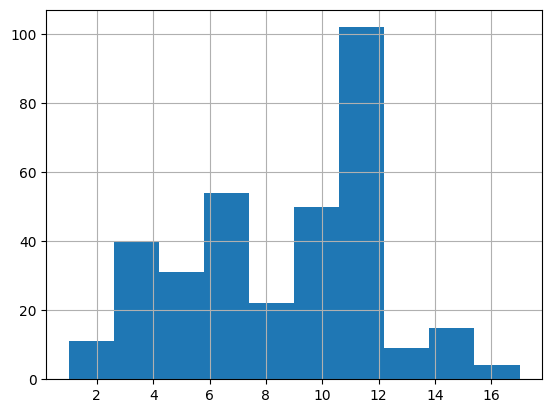

In [11]:
papers.length.hist()

Tell long and short papers apart (assumption on paper lenght)

In [12]:
long = papers[papers.length >= 10]
short = papers[papers.length < 10]
long.head()

,key,doi,url,ee,year,authors,title,venue,pages,length,type,access
1,conf/ircdl/BagchiD23,NaN,https://dblp.org/rec/conf/ircdl/BagchiD23,https://ceur-ws.org/Vol-3365/short1.pdf,2023,"[Mayukh Bagchi, Subhashis Das]",Disentangling Domain Ontologies.,IRCDL,17-28,11.0,Conference and Workshop Papers,open
2,conf/ircdl/BaglioniMPBM23,NaN,https://dblp.org/rec/conf/ircdl/BaglioniMPBM23,https://ceur-ws.org/Vol-3365/paper2.pdf,2023,"[Miriam Baglioni, Andrea Mannocci, Gina Pavone...",(Semi)automated disambiguation of scholarly re...,IRCDL,47-59,12.0,Conference and Workshop Papers,open
5,conf/ircdl/BernasconiCM23,NaN,https://dblp.org/rec/conf/ircdl/BernasconiCM23,https://ceur-ws.org/Vol-3365/paper1.pdf,2023,"[Eleonora Bernasconi, Miguel Ceriani, Massimo ...",Linked Data interfaces: a survey.,IRCDL,1-16,15.0,Conference and Workshop Papers,open
8,conf/ircdl/DeglInnocentiCC23,NaN,https://dblp.org/rec/conf/ircdl/DeglInnocentiCC23,https://ceur-ws.org/Vol-3365/paper5.pdf,2023,"[Emiliano Degl&apos;Innocenti, Leonardo Canova...",The RESTORE project: a final review.,IRCDL,167-179,12.0,Conference and Workshop Papers,open
10,conf/ircdl/GemelliVM23,NaN,https://dblp.org/rec/conf/ircdl/GemelliVM23,https://ceur-ws.org/Vol-3365/short14.pdf,2023,"[Andrea Gemelli, Emanuele Vivoli, Simone Marinai]",CTE: A Dataset for Contextualized Table Extrac...,IRCDL,197-208,11.0,Conference and Workshop Papers,open


In [13]:
short.head()

,key,doi,url,ee,year,authors,title,venue,pages,length,type,access
0,conf/ircdl/AmbrosinoAPS23,NaN,https://dblp.org/rec/conf/ircdl/AmbrosinoAPS23,https://ceur-ws.org/Vol-3365/short16.pdf,2023,"[Maria Anna Ambrosino, Vanja Annunziata, Maria...",The Hetor project: a joint effort to co-create...,IRCDL,216-224,8.0,Conference and Workshop Papers,open
3,conf/ircdl/BarbutiBRCP23,NaN,https://dblp.org/rec/conf/ircdl/BarbutiBRCP23,https://ceur-ws.org/Vol-3365/short17.pdf,2023,"[Nicola Barbuti, Mauro De Bari, Stefania Riso,...",The Open Memory Apulia Project. How Open Data ...,IRCDL,225-232,7.0,Conference and Workshop Papers,open
4,conf/ircdl/BardiBM23,NaN,https://dblp.org/rec/conf/ircdl/BardiBM23,https://ceur-ws.org/Vol-3365/short12.pdf,2023,"[Alessia Bardi, Margo Bargheer, Paolo Manghi]",A Discovery Hub for Diamond Open Access publis...,IRCDL,162-166,4.0,Conference and Workshop Papers,open
6,conf/ircdl/CastellanoSV23,NaN,https://dblp.org/rec/conf/ircdl/CastellanoSV23,https://ceur-ws.org/Vol-3365/short13.pdf,2023,"[Giovanna Castellano, Raffaele Scaringi, Genna...",Automatic analysis of artistic heritage throug...,IRCDL,192-196,4.0,Conference and Workshop Papers,open
7,conf/ircdl/CastellucciC23,NaN,https://dblp.org/rec/conf/ircdl/CastellucciC23,https://ceur-ws.org/Vol-3365/short15.pdf,2023,"[Paola Castellucci, Gianfranco Crupi]","Put the hands on! For a movable, interactive, ...",IRCDL,209-215,6.0,Conference and Workshop Papers,open


### Top contributors

Explode authors of each single paper

In [14]:
long_contributors = long.authors.explode().value_counts()
long_contributors

authors
Stefano Ferilli            18
Floriana Esposito          13
Nicola Ferro 0001          12
Gianmaria Silvello         11
Giorgio Maria Di Nunzio     9
                           ..
Caterina Bergami            1
Alessandra Pugnetti         1
Laura Pandolfo              1
Luca Pulina                 1
Marco Degemmis              1
Name: count, Length: 320, dtype: int64

Filter out Steering Committee and Advisory Board members and find top contributors (assumption on number of **long papers** published)

In [25]:
to_filter = 'bimbo|manghi|agosti|ferilli|grana|poggi|serra|silvello|catarci|thanos|esposito|tasso'
top_long = long_contributors[(~long_contributors.index.str.lower().str.contains(to_filter)) & (long_contributors > 3)]
top_long[:5]

authors
Nicola Ferro 0001          12
Giorgio Maria Di Nunzio     9
Nicola Orio                 7
Anna Maria Tammaro          6
Domenico Redavid            5
Name: count, dtype: int64

Repeat for **short papers**

In [16]:
short_contributors = short.authors.explode().value_counts()
short_contributors

authors
Nicola Ferro 0001       22
Gianmaria Silvello      14
Maristella Agosti       12
Nicola Orio             11
Paolo Manghi            11
                        ..
Laura Ciancio            1
Rosanna De Rosa 0001     1
Eleonora Pantò           1
Fabio Nascimbeni         1
Nicola Mastidoro         1
Name: count, Length: 319, dtype: int64

In [24]:
top_short = short_contributors[(~short_contributors.index.str.lower().str.contains(to_filter)) & (short_contributors > 3)]
top_short[:5]

authors
Nicola Ferro 0001    22
Nicola Orio          11
Carlo Meghini        10
Riccardo Miotto       6
Vittore Casarosa      6
Name: count, dtype: int64

# Cited papers

In [18]:
cited = pd.read_csv('../data/processed/cited_from_ircdl.tsv', sep='\t')
cited.head(5)

,id,pid,title,authors,venue,source,year
0,50|doi_________::dfca728ac0f8afd45a2089c232eb71c8,10.1108/03074801211282920,Benefits of a conceptual shift from library‐sp...,"Jane Chandler,Brett Stevens,Penny Ross,Getaneh...",New Library World,Crossref,2012-11-16
1,50|doi_________::fd062def19fb1641fd47bf0758138c0f,10.1007/978-3-642-22913-8_6,Transductive Learning of Logical Structures fr...,"Donato Malerba,Michelangelo Ceci,Corrado Loglisci",\N,"Crossref,Learning Structure and Schemas from D...",2011-01-01
2,50|doi_________::00f97f7f64a11decb82249c58f0f6a76,10.1145/872757.872809,Stream processing of XPath queries with predic...,"Ashish Kumar Gupta,Dan Suciu",Proceedings of the 2003 ACM SIGMOD internation...,"Crossref,SIGMOD Conference",2003-06-09
3,50|doi_________::35b24be7fb8275c4588d28aa02cd748e,10.1080/01615440.1995.9956362,Image Processing and the Study of Manuscript T...,Dino Buzzetti,Historical Methods: A Journal of Quantitative ...,Crossref,1995-06-01
4,50|doi_dedup___::fee929fdeab986ecb4ac662ce3a484e2,10.20368/1971-8829/798,The Challenge of Open Education,"Pantò, Eleonora,Comas-Quinn, Anna",\N,The Open University (ORO - Open Research Onlin...,2013-01-15


In [19]:
cited.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1753 entries, 0 to 1752
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       1753 non-null   object
 1   pid      1749 non-null   object
 2   title    1753 non-null   object
 3   authors  1746 non-null   object
 4   venue    1748 non-null   object
 5   source   1727 non-null   object
 6   year     1743 non-null   object
dtypes: object(7)
memory usage: 96.0+ KB


In [20]:
cited.venue.value_counts()

venue
\N                                                                                            437
D-Lib Magazine                                                                                 35
Communications of the ACM                                                                      31
IEEE Transactions on Pattern Analysis and Machine Intelligence                                 19
Information Processing &amp; Management                                                        18
                                                                                             ... 
Journal of Natural Language Processing                                                          1
2017 IEEE International Conference on Multimedia &amp; Expo Workshops (ICMEW)                   1
2016 13th International Conference on Remote Engineering and Virtual Instrumentation (REV)      1
2016 IEEE International Conference on Image Processing (ICIP)                                   1
International 

# Citing papers

In [21]:
citing = pd.read_csv('../data/processed/citing_ircdl.tsv', sep='\t')
citing.head(5)

,id,pid,title,authors,venue,source,year
0,50|doi_dedup___::dba616d3211017c80877471af84d2ff1,10.1504/ijmso.2014.059125,A linked open data approach for geolinguistics...,"Giorgio Maria Di Nunzio,Emanuele Di Buccio,Gia...","International Journal of Metadata, Semantics a...",Crossref,2014-01-01
1,50|doi_dedup___::8a53cd6b8ebfc5290238345e9c34d0f4,"10.1109/icpr56361.2022.9956189,10.48550/arxiv....",The LAM Dataset: A Novel Benchmark for Line-Le...,"Silvia Cascianelli,Pippi, Vittorio,Martin, Maa...",2022 26th International Conference on Pattern ...,"Crossref,Università degli studi di Modena e Re...",2022-08-21
2,50|doi_dedup___::045a8039ab61d25a2f92274a8adb9472,10.1007/978-3-030-39905-4_15,RepOSGate: Open Science Gateways for Instituti...,"Silvia Giannini,Michele Artini,Paolo Manghi,Le...",\N,"Crossref,Digital Libraries: The Era of Big Dat...",2020-01-01
3,50|doi_dedup___::61c30fba82de097bc5e999a8f8904ed6,"10.1007/s10032-022-00425-4,36687334,PMC9838515",Adaptive dewarping of severely warped camera-c...,"C. H. Nachappa,N. Shobha Rani,Peeta Basa Pati,...",International Journal on Document Analysis and...,Crossref,2023-01-09
4,50|doi_________::5f28cdb9fe5131c3c40b6c02b4c8b032,10.20913/1815-3186-2018-4-87-94,Мировые тенденции развития библиотек: оптимизм...,NaN,Bibliosphere,Crossref,2018-12-30


In [22]:
citing.venue.value_counts()

venue
\N                                                                                                          166
Procedia Computer Science                                                                                    12
Multimedia Tools and Applications                                                                             7
IEEE Access                                                                                                   6
International Journal on Digital Libraries                                                                    6
                                                                                                           ... 
Journal of Medical Internet Research                                                                          1
2020 IEEE Sixth International Conference on Big Data Computing Service and Applications (BigDataService)      1
2020 International Joint Conference on Neural Networks (IJCNN)                                    

In [23]:
citing[citing.venue == '\\N']

,id,pid,title,authors,venue,source,year
2,50|doi_dedup___::045a8039ab61d25a2f92274a8adb9472,10.1007/978-3-030-39905-4_15,RepOSGate: Open Science Gateways for Instituti...,"Silvia Giannini,Michele Artini,Paolo Manghi,Le...",\N,"Crossref,Digital Libraries: The Era of Big Dat...",2020-01-01
5,50|doi_________::e4fef07b42bf6d3c0563158c11801a12,10.1007/978-3-319-08732-0_2,Authoring Composite Documents and Their Descri...,"Tsuyoshi Sugibuchi,Nicolas Spyratos",\N,"Crossref,Communications in Computer and Inform...",2014-01-01
6,50|doi_________::e808f20ed76ff7dc48efdcd83cae7eb0,10.1007/978-3-319-08407-7_14,A relational unsupervised approach to author i...,"Stefano Ferilli,Fulvio Rotella,Fabio Leuzzi",\N,"Crossref,New Frontiers in Mining Complex Patte...",2014-01-01
10,50|doi_dedup___::8fd6574f332f77828d1f540d873fd569,10.1007/978-3-642-40050-6_7,Preserving Authenticity Evidence to Assess Pro...,"Luigi Briguglio,Maria Guercio,Silvio Salza",\N,"Crossref,Lecture Notes in Computer Science ISB...",2013-01-01
14,50|doi_dedup___::32ebde46194104a1f7cfad5524f4d1a6,10.1007/978-3-319-73165-0_3,"A Software Architecture for Narratives,A Softw...","Daniele Metilli,Filippo Benedetti,Valentina Ba...",\N,"Crossref,Communications in Computer and Inform...",2017-12-21
...,...,...,...,...,...,...,...
452,50|doi_________::c10bce171eb7e977848784a057e86b80,10.1007/978-3-319-27974-9_17,Enhancing Digital Heritage Archives Using Gami...,"Job King'Ori Maina,Hussein Suleman",\N,"Crossref,Digital Libraries: Providing Quality ...",2015-01-01
454,50|doi_________::bda4bae20a6838e563eb49c310602b4c,10.1007/978-3-030-59491-6_29,The GraphBRAIN System for Knowledge Graph Mana...,"Stefano Ferilli,Domenico Redavid",\N,"Crossref,Lecture Notes in Computer Science ISB...",2020-01-01
457,50|doi_dedup___::27f00c426f39cd3e2c692171d15079da,10.1007/978-3-642-33290-6_19,A system for exposing linguistic linked open d...,"Gianmaria Silvello,Giorgio Maria Di Nunzio,Ema...",\N,"Crossref,Theory and Practice of Digital Librar...",2012-01-01
465,50|doi_dedup___::af3354dda8ed946ae794fab0803c05ee,10.1007/978-3-319-16226-3_9,"Linking Biomedical Data to the Cloud,Linking B...","Zwicklbauer, Stefan,Seifert, Christin,Granitze...",\N,"Crossref,Smart Health ISBN: 9783319162256,Smar...",2015-01-01
